In [1]:
# pip install opendatasets

In [31]:

import opendatasets as od
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore')
from pyspark.sql.functions import col

In [3]:
# Findspark can add a startup file to the current IPython profile so that the environment vaiables will 
# be properly set and pyspark will be imported upon IPython startup
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')

In [4]:
# Build a sparksession and build a unique app name
spark=SparkSession.builder.appName('iteration-4: prediction_hospital_readmission_rate ').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/01 01:28:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
# Read the data from csv file into a dataframe
diabetic_data=spark.read.option("header","true").csv('Dataset/diabetic_data.csv')

In [6]:
diabetic_data.show(1)

22/10/01 01:28:35 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------+-----------+---------+------+------+------+-----------------+------------------------+-------------------+----------------+----------+--------------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|encounter_id|patient_nbr|     race|gender|   age|weight|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|payer_code|   medical_specialty|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_ser

In [7]:
diabetic_data.toPandas().head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
diabetic_data.printSchema()

root
 |-- encounter_id: string (nullable = true)
 |-- patient_nbr: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- admission_type_id: string (nullable = true)
 |-- discharge_disposition_id: string (nullable = true)
 |-- admission_source_id: string (nullable = true)
 |-- time_in_hospital: string (nullable = true)
 |-- payer_code: string (nullable = true)
 |-- medical_specialty: string (nullable = true)
 |-- num_lab_procedures: string (nullable = true)
 |-- num_procedures: string (nullable = true)
 |-- num_medications: string (nullable = true)
 |-- number_outpatient: string (nullable = true)
 |-- number_emergency: string (nullable = true)
 |-- number_inpatient: string (nullable = true)
 |-- diag_1: string (nullable = true)
 |-- diag_2: string (nullable = true)
 |-- diag_3: string (nullable = true)
 |-- number_diagnoses: string (nullable = true)
 |-- max_glu_ser

In [16]:
# Check number of rows and columns in the data
row=diabetic_data.count()
cols=len(diabetic_data.columns)
print('Total number of columns are - ', cols)
print('\nTotal number of records are - ', row)

Total number of columns are -  50

Total number of records are -  101766


In [34]:
diabetic_data.select('readmitted').groupBy('readmitted').count().sort(col('count').asc()).show()

+----------+-----+
|readmitted|count|
+----------+-----+
|       <30|11357|
|       >30|35545|
|        NO|54864|
+----------+-----+



In [ ]:
AirlineInfo.groupBy('Reporting_Airline','IATA_CODE_Reporting_Airline').count().sort(col('count').asc()).show()

## Pyspark SQL

In [9]:
# First, we have to register the DataFrame as a SQL temporary view.
diabetic_data.createOrReplaceTempView('diabetic_data')

# After that, we can use the SQL programming language for queries. 
results = spark.sql("SELECT * FROM diabetic_data")
results.show()

+------------+-----------+---------------+------+--------+------+-----------------+------------------------+-------------------+----------------+----------+--------------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+-------------+---------+---------+-----------+------------+-------------+--------+--------+------------+----------+-------+-----------+-------+-------------------+-------------------+------------------------+-----------------------+----------------------+------+-----------+----------+
|encounter_id|patient_nbr|           race|gender|     age|weight|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|payer_code|   medical_specialty|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagn

In [11]:
spark.sql("select distinct race from diabetic_data").show()

+---------------+
|           race|
+---------------+
|      Caucasian|
|          Other|
|AfricanAmerican|
|       Hispanic|
|          Asian|
|              ?|
+---------------+



In [12]:
spark.sql("select distinct gender from diabetic_data").show()

+---------------+
|         gender|
+---------------+
|         Female|
|Unknown/Invalid|
|           Male|
+---------------+



In [15]:
diabetic_data.select('gender').toPandas().value_counts()

gender         
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

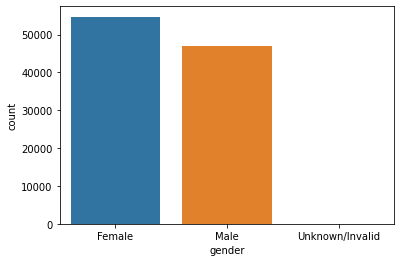

In [23]:
sns.countplot(data=(diabetic_data.select('gender').toPandas()), x='gender')

<AxesSubplot:xlabel='race', ylabel='count'>

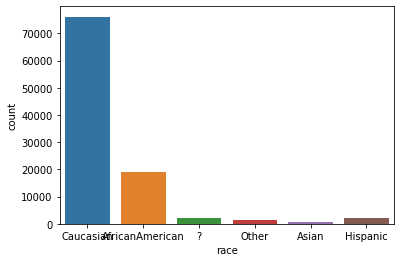

In [24]:
sns.countplot(data=(diabetic_data.select('race').toPandas()), x='race')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

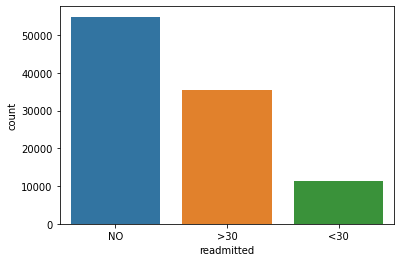

In [25]:
sns.countplot(data=(diabetic_data.select('readmitted').toPandas()), x='readmitted')

In [29]:
sns.barplot(data=(diabetic_data.select('race','readmitted').toPandas()), x='race',y='readmitted')

TypeError: Neither the `x` nor `y` variable appears to be numeric.